In [0]:
# get more RAM
a = []
while True:
  a.append('lot')

In [0]:
! python -m tensorboard.main --logdir=/path/to/logs

In [1]:
import glob
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

import os
import time

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import json
import glob
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from PIL import Image

tf.__version__


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


'2.2.0-rc3'

In [2]:
import numpy as np
import glob
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import os
#%tensorflow_version 1.x
from PIL import Image
from keras import layers
from keras.models import Model
from keras.models import load_model
from keras.utils.vis_utils import plot_model  #plotting the model structure
from keras import callbacks
from datetime import datetime
import os
import cv2
import string
import numpy as np


from keras.models import Model
from keras.layers import Input, Dense, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization
from keras.callbacks import ModelCheckpoint, EarlyStopping, TensorBoard
import warnings
warnings.filterwarnings('ignore')
from keras import models
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint


from keras import layers        # functional 
from keras.models import Model
from keras.models import load_model
from keras import callbacks
import cv2
import string
import numpy as np

from packaging import version
import tensorflow as tf
from tensorflow import keras

Using TensorFlow backend.


In [3]:
tf.__version__

'2.2.0-rc3'

In [0]:
# get the datasets

! wget "https://ndownloader.figshare.com/files/22307958" -O mc_001.tar.gz
! wget "https://ndownloader.figshare.com/files/22318224" -O mc_002.tar.gz
! wget "https://ndownloader.figshare.com/files/22335879" -O mc_003.tar.gz
! wget "https://ndownloader.figshare.com/files/22344393" -O mc_004.tar.gz
! wget "https://ndownloader.figshare.com/files/22346499" -O mc_005.tar.gz
! wget "https://ndownloader.figshare.com/files/22397457" -O mc_006.tar.gz
! wget "https://ndownloader.figshare.com/files/22414434" -O mc_007.tar.gz
! wget "https://ndownloader.figshare.com/files/22422816" -O mc_008.tar.gz
! wget "https://ndownloader.figshare.com/files/22451057" -O mc_009.tar.gz
#! wget "" -O mc_010.tar.gz

--2020-04-29 18:44:45--  https://ndownloader.figshare.com/files/22307958
Resolving ndownloader.figshare.com (ndownloader.figshare.com)... 52.17.144.100, 18.200.62.117, 34.242.129.35, ...
Connecting to ndownloader.figshare.com (ndownloader.figshare.com)|52.17.144.100|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://s3-eu-west-1.amazonaws.com/pfigshare-u-files/22307958/mc_001.tar.gz [following]
--2020-04-29 18:44:46--  https://s3-eu-west-1.amazonaws.com/pfigshare-u-files/22307958/mc_001.tar.gz
Resolving s3-eu-west-1.amazonaws.com (s3-eu-west-1.amazonaws.com)... 52.218.52.12
Connecting to s3-eu-west-1.amazonaws.com (s3-eu-west-1.amazonaws.com)|52.218.52.12|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1393346368 (1.3G) [application/gzip]
Saving to: ‘mc_001.tar.gz’

mc_001.tar.gz       100%[===================>]   1.30G  21.3MB/s    in 64s     

2020-04-29 18:45:50 (20.7 MB/s) - ‘mc_001.tar.gz’ saved [1393346368/1393346368]


In [0]:
!tar -xvf mc_001.tar.gz > /dev/null
!tar -xvf mc_002.tar.gz > /dev/null
!tar -xvf mc_003.tar.gz > /dev/null
!tar -xvf mc_004.tar.gz > /dev/null
!tar -xvf mc_005.tar.gz > /dev/null
!tar -xvf mc_006.tar.gz > /dev/null
!tar -xvf mc_007.tar.gz > /dev/null
!tar -xvf mc_008.tar.gz > /dev/null
!tar -xvf mc_009.tar.gz > /dev/null
#!tar -xvf mc_010.tar.gz > /dev/null
! echo "Untaring... done..."

In [0]:
! mkdir data
! find mc_001 -name '*.*' | xargs mv --target-directory=data
! find mc_002 -name '*.*' | xargs mv --target-directory=data
! find mc_003 -name '*.*' | xargs mv --target-directory=data
! find mc_004 -name '*.*' | xargs mv --target-directory=data
! find mc_005 -name '*.*' | xargs mv --target-directory=data
! find mc_006 -name '*.*' | xargs mv --target-directory=data
! find mc_007 -name '*.*' | xargs mv --target-directory=data
! find mc_008 -name '*.*' | xargs mv --target-directory=data
! find mc_009 -name '*.*' | xargs mv --target-directory=data
#! find mc_001 -name '*.*' | xargs mv --target-directory=data

In [0]:
! du -hs mc_009

In [0]:
! du -hs data

In [0]:
png_files = glob.glob('data/*.png')
png_files[0]

(360, 640, 4)


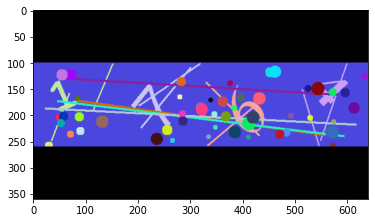

In [5]:
img = cv2.imread(png_files[0],cv2.IMREAD_UNCHANGED)
print(img.shape)
plt.imshow(img)
plt.show()

In [0]:
DATA_DIR = 'data'  # 302410 images. validate accuracy: 98.8%
H, W, C = 360, 640, 4
N_LABELS = 10
D = 4

In [0]:
def parse_filepath(filepath):
    try:
        path, filename = os.path.split(filepath)
        filename, ext = os.path.splitext(filename)
        label, _ = filename.split("_")
        return label
    except Exception as e:
        print('error to parse %s. %s' % (filepath, e))
        return None, None

In [8]:
# create a pandas data frame of images, age, gender and race
files = glob.glob(os.path.join(DATA_DIR, "*.png"))
attributes = list(map(parse_filepath, files))

df = pd.DataFrame(attributes)
df['file'] = files
df.columns = ['label', 'file']
df = df.dropna()
df.head()

,label,file
0,1764,data/1764_281848.png
1,5633,data/5633_100733.png
2,8090,data/8090_399619.png
3,3736,data/3736_594885.png
4,8632,data/8632_701765.png


In [15]:
p = np.random.permutation(len(df))
train_up_to = int(len(df) * 0.95)
train_idx = p[:train_up_to]
test_idx = p[train_up_to:]

# split train_idx further into training and validation set
train_up_to = int(train_up_to * 0.95)
train_idx, valid_idx = train_idx[:train_up_to], train_idx[train_up_to:]

print('train count: %s, valid count: %s, test count: %s' % (
    len(train_idx), len(valid_idx), len(test_idx)))

train count: 812250, valid count: 42750, test count: 45000


In [0]:
from tensorflow.keras.utils import to_categorical
from PIL import Image



def get_data_generator(df, indices, for_training, batch_size=16):
    images, labels = [], []
    while True:
        for i in indices:
            r = df.iloc[i]
            file, label = r['file'], r['label']
            im = Image.open(file)
            im = im.resize((H, W))
            im = np.array(im) / 255.0
            images.append(np.array(im))
            labels.append(np.array([np.array(to_categorical(int(i), N_LABELS)) for i in label]))
            if len(images) >= batch_size:
#                 print(np.array(images), np.array(labels))
                yield np.array(images), np.array(labels)
                images, labels = [], []
        if not for_training:
            break

In [18]:
from tensorflow.keras.layers import Input, Dense, BatchNormalization, Conv2D, MaxPool2D, GlobalMaxPool2D, Dropout
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.models import Model

input_layer = tf.keras.Input(shape=(H, W, C))
x = tf.keras.layers.Conv2D(32, 3, activation='relu')(input_layer)
x = tf.keras.layers.MaxPooling2D((2, 2))(x)
x = tf.keras.layers.Conv2D(64, 3, activation='relu')(x)
x = tf.keras.layers.MaxPooling2D((2, 2))(x)
#x = tf.keras.layers.Dropout(0.3)(x)
x = tf.keras.layers.Conv2D(64, 3, activation='relu')(x)
x = tf.keras.layers.MaxPooling2D((2, 2))(x)

x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(1024, activation='relu')(x)
x = tf.keras.layers.Dropout(0.5)(x)

x = tf.keras.layers.Dense(D * N_LABELS, activation='softmax')(x)
x = tf.keras.layers.Reshape((D, N_LABELS))(x)

model = tf.keras.models.Model(inputs=input_layer, outputs=x)

model.compile(optimizer='adam', 
              loss='categorical_crossentropy',
              metrics= ['accuracy'])
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 360, 640, 4)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 358, 638, 32)      1184      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 179, 319, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 177, 317, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 88, 158, 64)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 86, 156, 64)       36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 43, 78, 64)        0     

In [0]:
from tensorflow.keras.utils import  plot_model as pm  #plotting the model structure
pm(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True,dpi=60)

In [0]:
from tensorflow.keras.callbacks import ModelCheckpoint

batch_size = 2048
valid_batch_size = 64
train_gen = get_data_generator(df, train_idx, for_training=True, batch_size=batch_size)
valid_gen = get_data_generator(df, valid_idx, for_training=True, batch_size=valid_batch_size)

callbacks = [
    ModelCheckpoint("./model_checkpoint", monitor='val_loss')
]
# for storing logs into tensorboard
logdir="logs/fit/" + datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = keras.callbacks.TensorBoard(log_dir=logdir)

history = model.fit(train_gen,
                    steps_per_epoch=len(train_idx)//batch_size,
                    epochs=20,
                     callbacks=[tensorboard_callback,callbacks],
                    validation_data=valid_gen,
                    validation_steps=len(valid_idx)//valid_batch_size)

In [0]:
plt.figure(figsize=(12,7))
legend_acc = []
for item in hist.history.keys():
  if item.split('_')[-1:] == ['acc']:
    #print("Accuracy = ",item)
    legend_acc.append(item)
    plt.plot(hist.history[item])
plt.ylabel('Accuracy ->')
plt.xlabel('Epoch ->')
plt.legend(legend_acc, loc='upper left')
plt.show()

plt.figure(figsize=(12,7))
legend_acc = []
for item in hist.history.keys():
  if item.split('_')[-1:] == ['loss']:
    #print("Accuracy = ",item)
    legend_acc.append(item)
    plt.plot(hist.history[item])
plt.ylabel('Loss ->')
plt.xlabel('Epoch ->')
plt.legend(legend_acc, loc='upper right')
plt.show()

In [0]:
def  plot_train_history(history):
    fig, axes = plt.subplots(1, 2, figsize=(20, 5))

    axes[0].plot(history.history['accuracy'], label='Train accuracy')
    axes[0].plot(history.history['val_accuracy'], label='Val accuracy')
    axes[0].set_xlabel('Epochs')
    axes[0].legend() 

    axes[1].plot(history.history['loss'], label='Training loss')
    axes[1].plot(history.history['val_loss'], label='Validation loss')
    axes[1].set_xlabel('Epochs')
    axes[1].legend()

plot_train_history(history)

In [0]:
# https://www.tensorflow.org/tensorboard/graphs
%tensorboard --logdir logs

In [0]:
# download the model in computer for later use

model.save('multicolor_captcha.h5')
# download the model from colab
from google.colab import files
files.download('multicolor_captcha.h5')

In [0]:
test_gen = get_data_generator(df, test_idx, for_training=False, batch_size=128)
dict(zip(model.metrics_names, model.evaluate(test_gen, steps=len(test_idx)//128)))

In [0]:
test_gen = get_data_generator(df, test_idx, for_training=False, batch_size=128)
x_test, y_test = next(test_gen)

y_pred = model.predict_on_batch(x_test)

y_true = tf.math.argmax(y_test, axis=-1)
y_pred = tf.math.argmax(y_pred, axis=-1)

In [0]:
import math
n = 30
random_indices = np.random.permutation(n)
n_cols = 5
n_rows = math.ceil(n / n_cols)
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 20))
for i, img_idx in enumerate(random_indices):
    ax = axes.flat[i]
    ax.imshow(x_test[img_idx])
    ax.set_title('pred: {}'.format(
        ''.join(map(str, y_pred[img_idx].numpy()))))
    ax.set_xlabel('true: {}'.format(
        ''.join(map(str, y_true[img_idx].numpy()))))
    ax.set_xticks([])
    ax.set_yticks([])